#Actividad 8 
Solución numérica de ecuaciones diferenciales con Python.


In [ ]:
# Marzo 11, 2021

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

Método de Euler

In [ ]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

**Ejercicio 1**\
Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

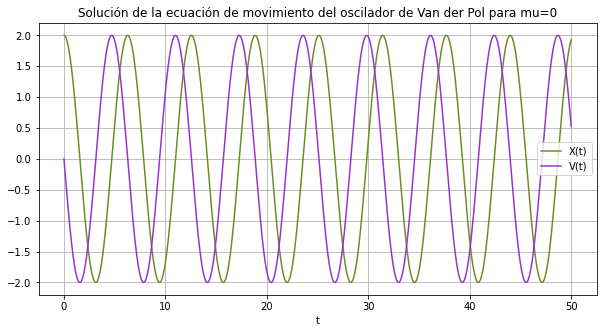

In [ ]:
#Definimos la función 
def VanderPol(y,t,mu):
  x, v = y
  dydt = [ v , mu*(1-x**2)*v - x]
  return dydt

#Definimos las condiciones iniciales
y0 = [2,0]

#Tiempo para la integración  de 0 a 50 segundos
t = np.linspace(0,50,1000)

# mu=0
mu=0

# Usamos el método de integración de scipy.integrate.odeint
y = odeint(VanderPol, y0, t, args=(mu, ))
plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], color='olivedrab' , label='X(t)')
plt.plot(t, y[:, 1], color='darkorchid', label='V(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador de Van der Pol para mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

Para $\mu=1$

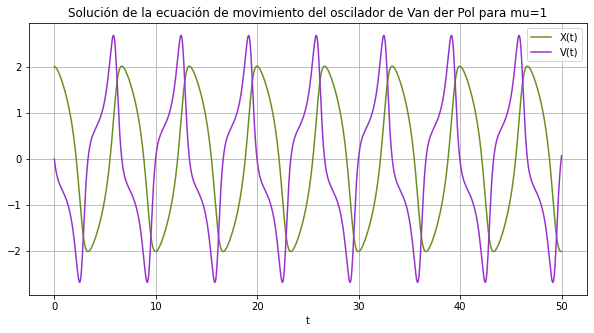

In [ ]:
mu=1
# Usamos el método de integración de scipy.integrate.odeint
y = odeint(VanderPol, y0, t, args=(mu, ))
plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], color='olivedrab' , label='X(t)')
plt.plot(t, y[:, 1], color='darkorchid', label='V(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador de Van der Pol para mu=1')
plt.xlabel('t')
plt.grid()
plt.show()


Para $\mu=2$

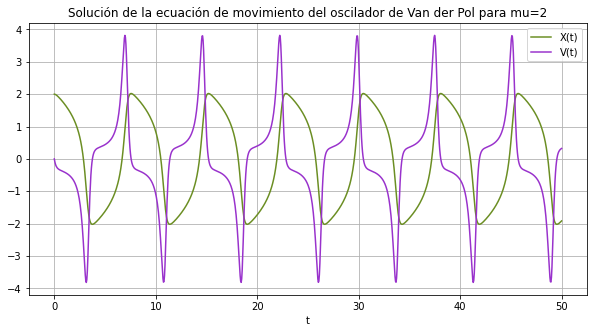

In [ ]:
mu=2
# Usamos el método de integración de scipy.integrate.odeint
y = odeint(VanderPol, y0, t, args=(mu, ))
plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], color='olivedrab' , label='X(t)')
plt.plot(t, y[:, 1], color='darkorchid', label='V(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador de Van der Pol para mu=2')
plt.xlabel('t')
plt.grid()
plt.show()

Para $\mu=3$

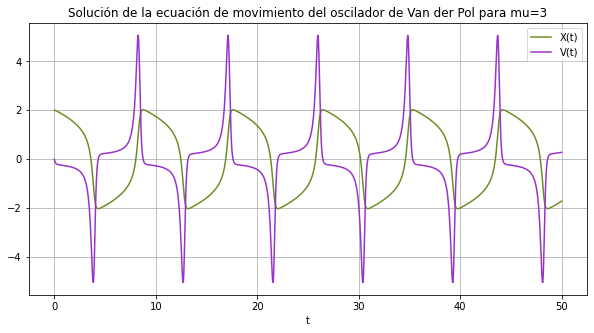

In [ ]:
mu=3
# Usamos el método de integración de scipy.integrate.odeint
y = odeint(VanderPol, y0, t, args=(mu, ))
plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], color='olivedrab' , label='X(t)')
plt.plot(t, y[:, 1], color='darkorchid', label='V(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador de Van der Pol para mu=3')
plt.xlabel('t')
plt.grid()
plt.show()

Para $\mu=4$

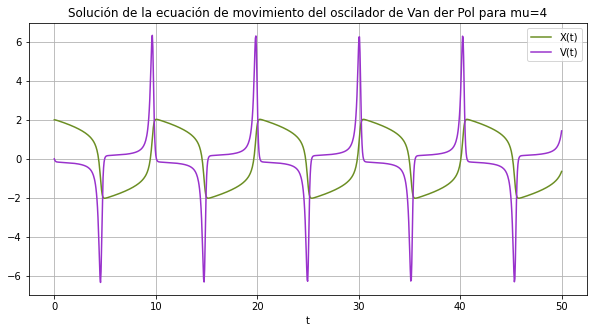

In [ ]:
mu=4
# Usamos el método de integración de scipy.integrate.odeint
y = odeint(VanderPol, y0, t, args=(mu, ))
plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], color='olivedrab' , label='X(t)')
plt.plot(t, y[:, 1], color='darkorchid', label='V(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador de Van der Pol para mu=4')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 2**\
Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

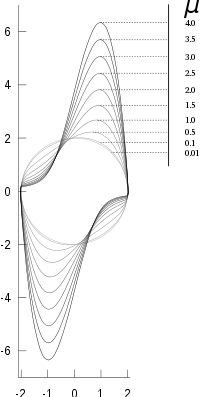

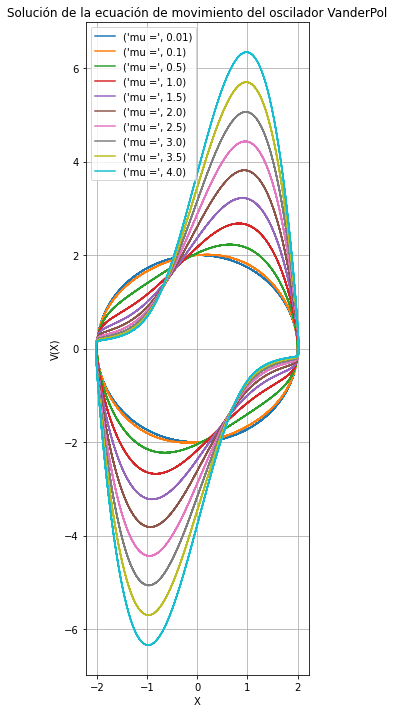

In [ ]:
#Usando odeint
#Definimos la función 
def VanderPol(y,t,mu):
  x, v = y
  dydt = [ v , mu*(1-x**2)*v - x]
  return dydt

#Tiempo de integración
t = np.linspace( 0, 50, 100000)

plt.figure(figsize=(4, 12))
for mu in [0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]:
  y=odeint(VanderPol, y0, t, args=(mu,))
  plt.plot(y[:,0], y[:,1], label=("mu =", mu))
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador VanderPol')
plt.xlabel('X')
plt.ylabel('V(X)')
plt.grid()
plt.show()

#Método de Runge-Kutta
Los métodos de Runge-Kutta son una serie de algoritmos explícitos e implícitos para resolver ecuaciones diferenciales ordinarias.

**Ejercicio 3**\
Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:
- Método de Euler
- Método de Runge-Kutta RK4
- Función *scipy.integrate.odeint* ó *scipy.integrate-solve_ivp*


**Ejercicio 3.1**\
$\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 - g = 0, \ x(0)=0, \ \frac{dx}{dt}(0)=0, \ k > 0.$\
$$\begin{equation*}
v=\frac{dx}{dt}
\end{equation*}$$\
$$\begin{equation*}
\frac{dv}{dt} + k (v)^2 -g = 0
\end{equation*}$$\
Despejando $$\begin{equation*}
\frac{dv}{dt} = - k (v)^2 +g 
\end{equation*}$$

In [ ]:
#Definimos la función
def Caída(y,t,k,g):
  x, v = y
  dvdt = [v, -k*v**2 + g]
  return dvdt

#tiempo de integración
t = np.linspace(0, 50, 100000)

#definimos las Variables
k=1
g=9.8
#Condiciones iniciales
t0=0.0
V0= 0.0
X0= 0.0

**Método de Euler**

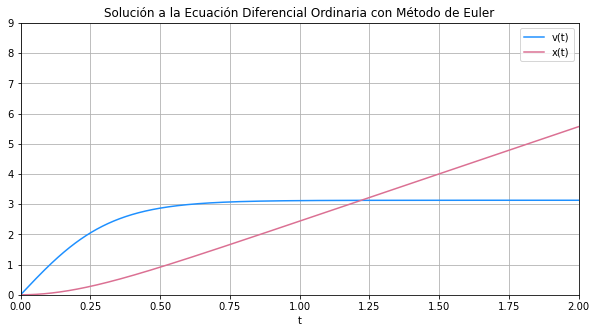

In [ ]:
f = lambda v,t: -k*v**2 + g 
v = np.zeros(len(t))
v[0] = V0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])

# Para resolver la segunda ecuación:

x = np.zeros(len(t))
x[0] = X0
    
for n in range(0,len(t)-1):
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])


plt.figure(figsize=(10,5))
plt.plot(t,v,'dodgerblue',t,x,'palevioletred')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución a la Ecuación Diferencial Ordinaria con Método de Euler')
plt.axis([0,2,0,9])
plt.grid()
plt.xlabel('t')
plt.show()

**Método Runge-Kutta RK4**

In [ ]:
# Tomada la versión de Joshua Simon
# https://github.com/JoshuaSimon/Classic-Fourth-Order-Runge-Kutta-Method-RK4/blob/master/Four_Step_Runge_Kutta_ODE1.py

"""Four_Step_Runge_Kutta_ODE1.py 

Implementation of the classic fourth-order method also refered as the
"original" Runge–Kutta method. This method is an implicit four step
Runge-Kutta method which solves an intial value problem numerically. 
"""

from datetime import datetime
import matplotlib.pyplot as plt
from math import exp, sqrt 

__date__ = datetime(2019, 6, 6) # or version string or something
__author__ = "Joshua Simon"


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

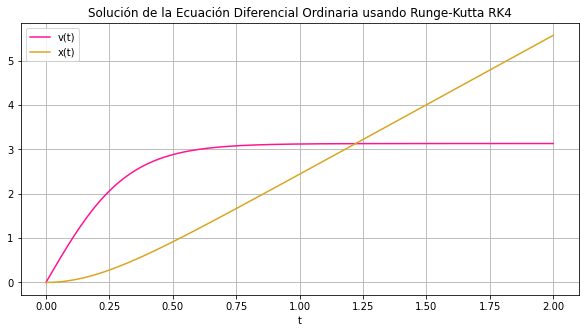

In [ ]:
#Ahora usaremos Runge-Kutta

#Condiciones iniciales
t0_1=0.0
x0_1=0.0
v0_1=0.0

#Constantes
k_1=1 
g=9.81
t = 0
v_1=0


#Paso
a=0.0
b=2.0
Npts=250
h_1=(b-a)/Npts



f = lambda t,v: -k_1*v_1**2 + g 

t_values = [t0_1]
v_1_values = [v0_1]



for _ in range(Npts):
  t, v_1 = runge_kutta(f, t, v_1, h_1)
  t_values.append(t)
  v_1_values.append(v_1)

#No podemos usar RK4 entonces usare solve_ivp
def f1_2(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt
#Ya tenemos definido el paso y el intervalo mediante a y b y npts_1
#Tenemos as condiciones inciiales en t
y_0=[x0_1,v0_1]
t1_2=np.linspace(t0_1,b,Npts)

#Definimos tolerancia absoluta y relativa
abserr = 1.0e-8
relerr = 1.0e-6
sol = solve_ivp(lambda t, y, mu: f1_2(t, y, k_1, g),(t0_1,b), y0=y_0, 
                method='RK45', t_eval=t1_2, args=(mu,), rtol=relerr, atol=abserr)
x1_2=sol.y[0]


plt.figure(figsize=(10,5))
plt.plot(t_values, v_1_values, 'deeppink', label='v(t)')
plt.plot(t1_2,x1_2, 'goldenrod',label='x(t)')
plt.legend(loc='best')
plt.title('Solución de la Ecuación Diferencial Ordinaria usando Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()

**Método de integrate.odeint**

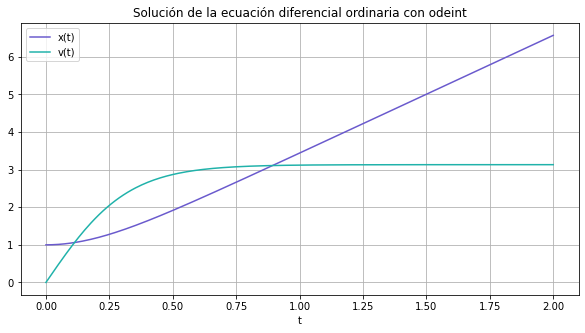

In [ ]:
#Definimos el tiempo de integración
t = np.linspace(a,b,Npts)

#Definimos las condiciones iniciales 

a0 = [1.0, 0.0]

y=odeint(Caída, a0, t, args=(k,g), atol=abserr, rtol=relerr)

#x(t) 
y1=y[:,0]
#v(t)
y2=y[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'slateblue', label='x(t)')
plt.plot(t, y2, 'lightseagreen', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.2**\
$$\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}$$
$$\begin{equation*}
v=\frac{dy}{dx}
\end{equation*}$$
$$\begin{equation*}
\frac{dv}{dt} + \frac{2}{x} v + y^5 =0
\end{equation*}$$
$$\begin{equation*}
\frac{dv}{dt} = - \frac{2}{x} v - y^5
\end{equation*}$$
Las ecuaciones de primer orden no dependen de 2 variables, por lo tanto no podemos usar el método de euler ni de Runge_Kutta para obtener una solución.

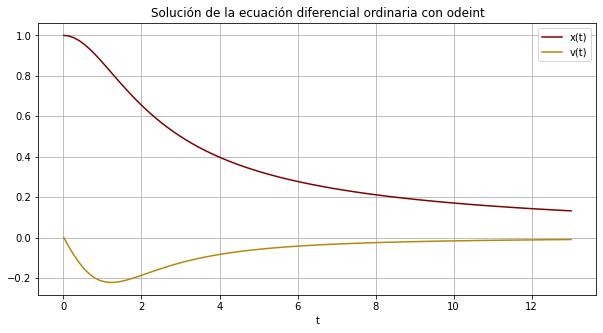

In [ ]:
#Definimos la función
def f(a,x):
  y,v = a
  dadx=[v, -(2/x)*v - y**5]
  return dadx

#Condiciones iniciales
a0 = [1.0,0.0]

#X de integracion
x = np.linspace(0.01, 13.01, 100)

R = odeint(f, a0, x)

# X(t) y(t)
y1=R[:,0]
y2=R[:,1]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'maroon', label='x(t)')
plt.plot(x, y2, 'darkgoldenrod', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()





**Ejercicio 3.3**\
$$\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}$$
$$\begin{equation*}
v=\frac{dy}{dx}
\end{equation*}$$
$$\begin{equation*}
\frac{dv}{dx} = (x-1)^2 + y^2 + v -2
\end{equation*}$$
Al igual que el ejercico anterior, las ecuaciones de primer orden no dependen de solo dos variables por lo tanto, usamos el metodo de odeint.

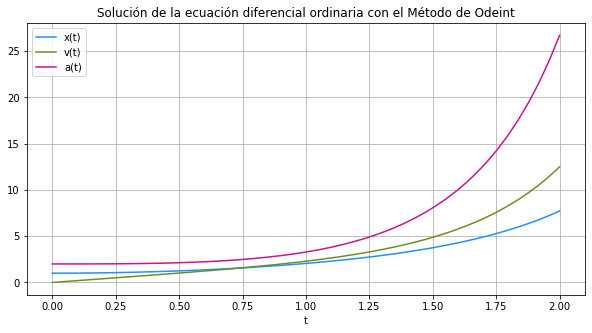

In [ ]:
#Definimos la funcion
def fun(b,x):
  y, v, a=b
  dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
  return dbdx

#Condiciones iniciales
x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 2.0
a_0 = [y0,v0,a0]

#Definimos x 
x = np.linspace(x0, a0, 50)

#Solución de la forma
R = odeint(fun, a_0, x)

#x(t) v(t)
y1=R[:,0]
y2=R[:,1]
y3=R[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'dodgerblue', label='x(t)')
plt.plot(x, y2, 'olivedrab', label='v(t)')
plt.plot(x, y3, 'mediumvioletred', label='a(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Odeint')
plt.xlabel('t')
plt.grid()
plt.show()